# Earthquake Prediction



# Name: FATHIMA THASNI Organization: Entri Elevate Date: 28/05/2024

The prediction of seismic events, such as earthquakes, has long been a significant challenge in geophysics due to the complex and often unpredictable nature of tectonic activity. Accurate seismic event prediction can save countless lives, reduce economic losses, and improve disaster preparedness and response. With advancements in data science and machine learning, new opportunities have emerged to analyze and interpret vast amounts of seismic data to identify patterns and potential precursors to seismic events.

Seismic Event Prediction. date, time, lat, long, country, city, area,
       direction, dist, depth, xm, md, richter, mw, ms, mb

In [1]:
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive')


import pandas as pd

file_path = '/content/drive/My Drive/earthquakedata.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
df

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [5]:
df.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [6]:
df.shape

(24007, 17)

In [7]:
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [8]:
df.columns

Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

Data Preprocessing

In [9]:
df = df.drop('id',axis=1)

In [10]:
import datetime
import time

timestamp = []
for d, t in zip(df['date'], df['time']):
  ts = datetime.datetime.strptime(d+' '+t, '%Y.%m.%d %I:%M:%S %p')
  timestamp.append(time.mktime(ts.timetuple()))
timeStamp = pd.Series(timestamp)
df['Timestamp'] = timeStamp.values
final_data = df.drop(['date', 'time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
df = final_data
df.head()

,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,Timestamp
0,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,1.053390e+09
1,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,1.185927e+09
2,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,2.633497e+08
3,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,8.589907e+08
4,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,9.546371e+08


In [11]:
df.dtypes

lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
Timestamp    float64
dtype: object

In [12]:
# Data Encoding
label_encoder = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder.fit(df[col])
      df[col] = label_encoder.transform(df[col])
df.dtypes

lat          float64
long         float64
country        int64
city           int64
area           int64
direction      int64
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
Timestamp    float64
dtype: object

In [13]:
df.isnull().sum()

lat              0
long             0
country          0
city             0
area             0
direction        0
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
Timestamp        0
dtype: int64

In [14]:
# Imputing Missing Values with Mean
si=SimpleImputer(missing_values = np.nan, strategy="mean")
si.fit(df[["dist","mw"]])
df[["dist","mw"]] = si.transform(df[["dist","mw"]])
df.isnull().sum()

lat          0
long         0
country      0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
Timestamp    0
dtype: int64

Data Visualization

In [15]:
import plotly.express as px
px.scatter(df, x='richter',y='xm', color="direction")

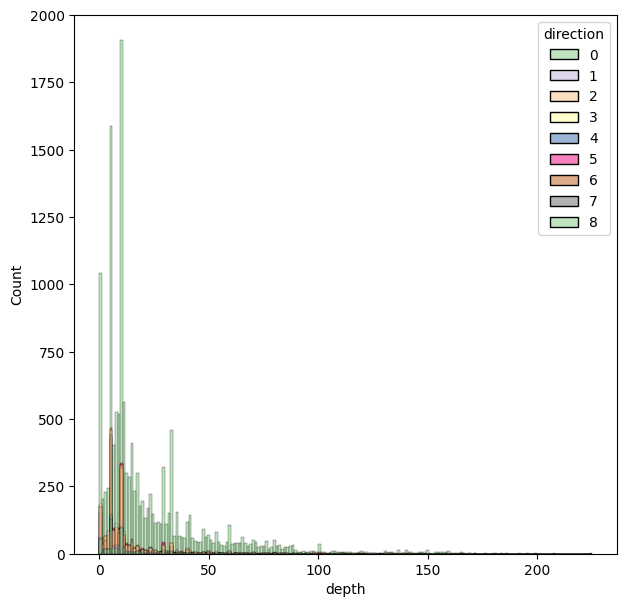

In [16]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='depth', hue='direction',palette = 'Accent')
plt.show()

<Figure size 700x700 with 0 Axes>

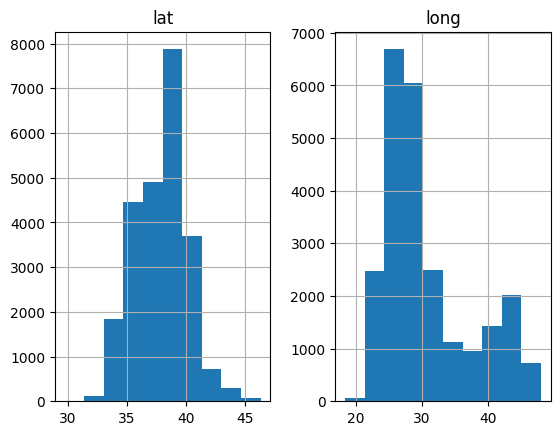

In [17]:
plt.figure(figsize=(7,7))
df[['lat','long']].hist()
plt.show()

<Axes: >

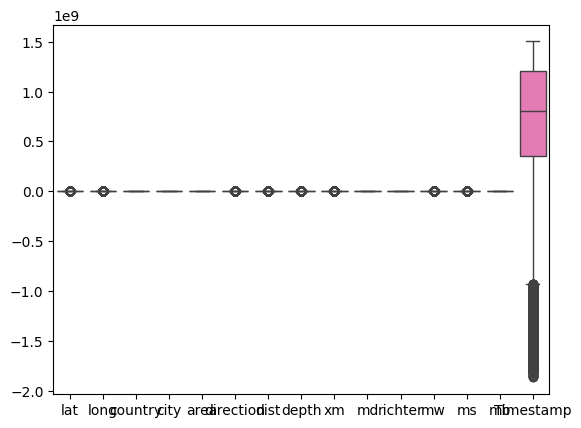

In [18]:
sns.boxplot(df)

In [19]:
sns.pairplot(df)
plt.title('Pairplot ')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='xm', ylabel='Density'>

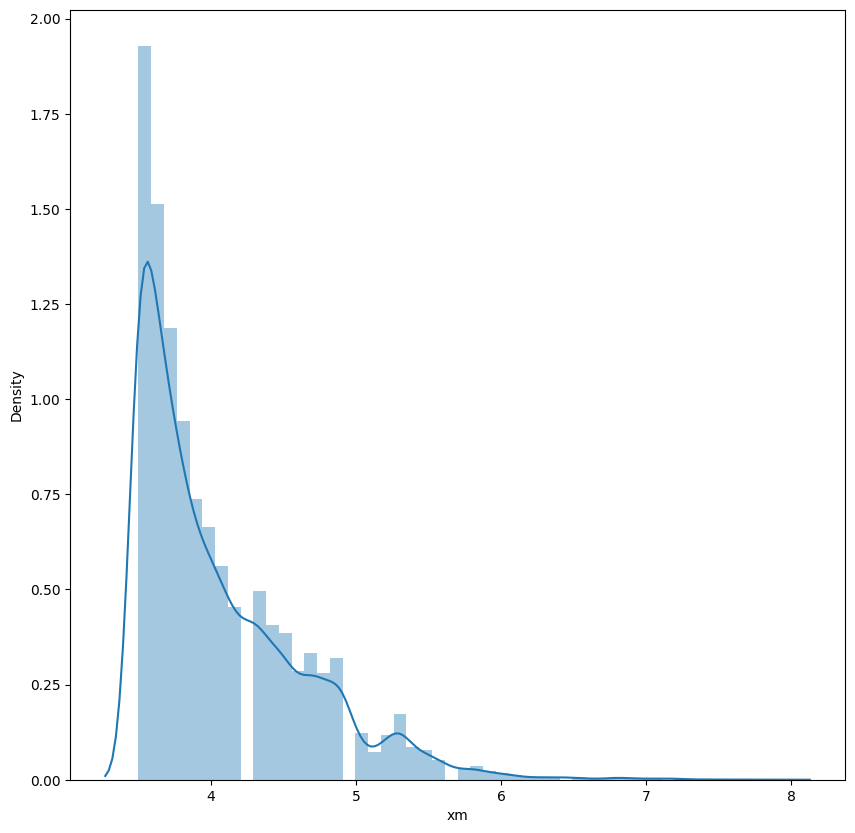

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(df.xm)

In [21]:
df [[ 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb']].skew()

lat           0.078521
long          0.996274
country      -1.284137
city         -0.842656
area         -0.829028
direction    -1.035866
dist         15.558178
depth         2.879158
xm            1.430748
md            0.235139
richter      -0.019787
mw           -5.011167
ms            2.130573
mb            0.536185
dtype: float64

Text(0, 0.5, 'ms')

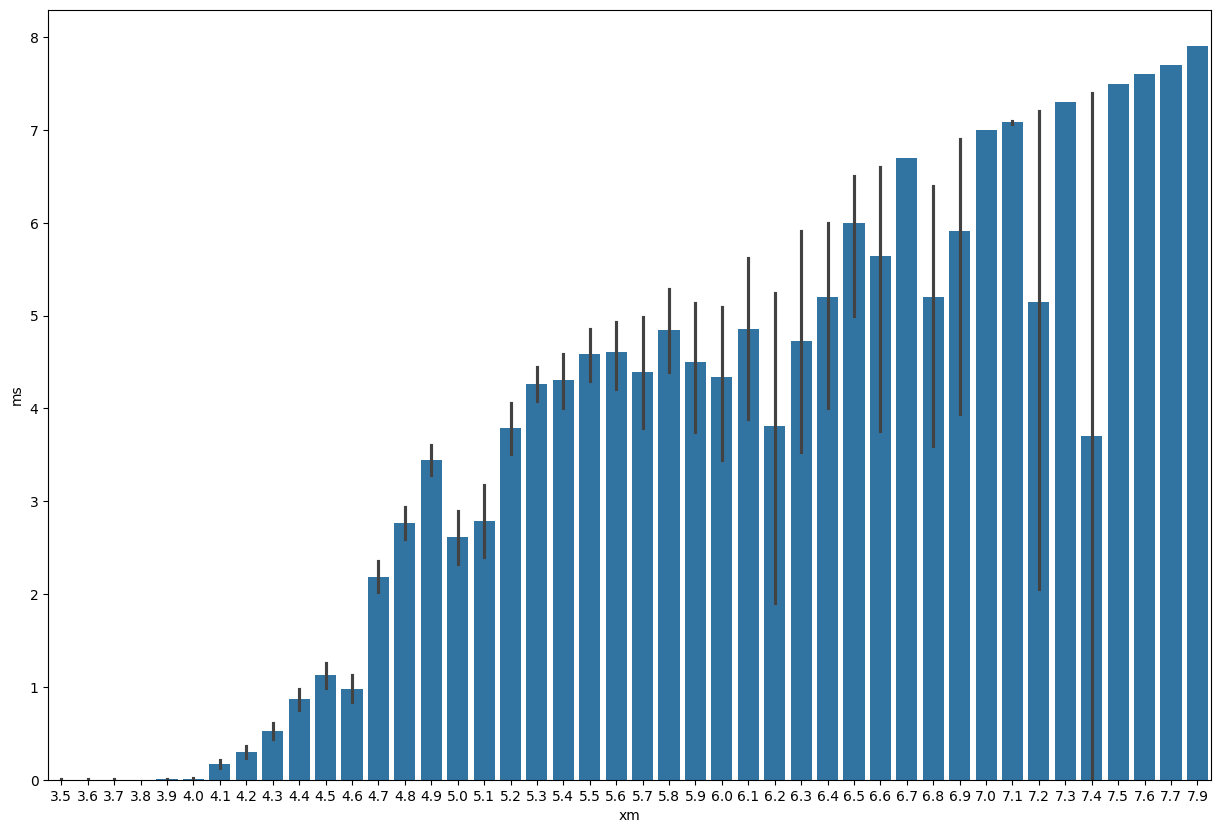

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['xm'], y=df['ms'])
plt.xlabel('xm')
plt.ylabel('ms')

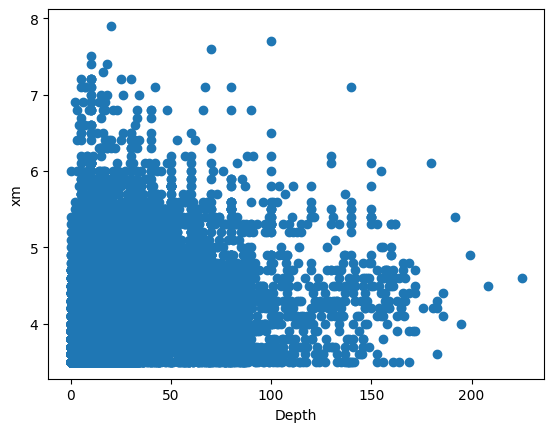

In [23]:
plt.scatter(df.depth, df.xm)
plt.xlabel("Depth")
plt.ylabel("xm")
plt.show()

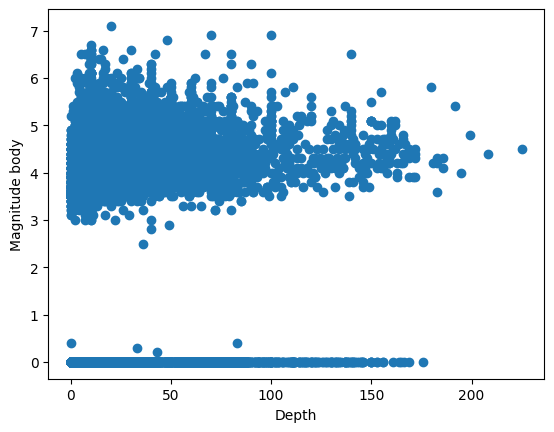

In [24]:
plt.scatter(df.depth, df.mb)
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

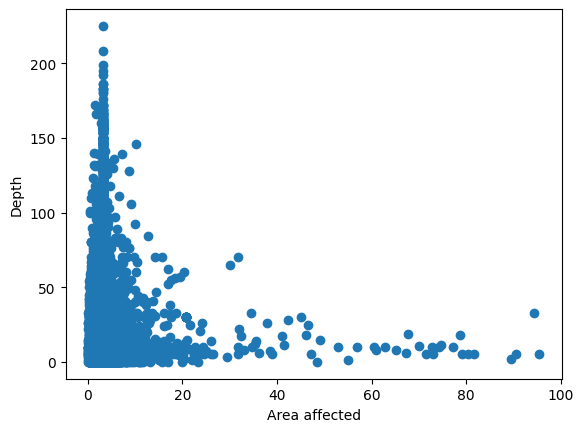

In [25]:
plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("Depth")
plt.show()

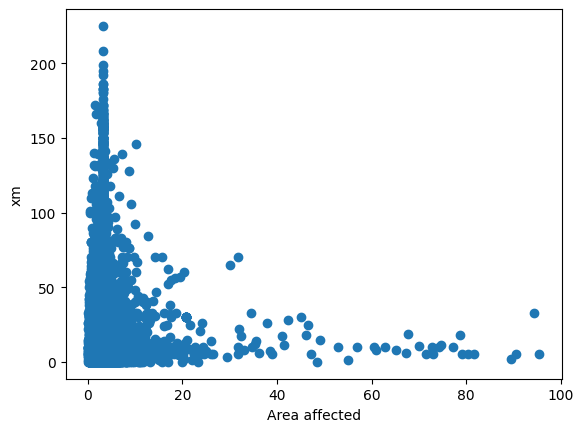

In [26]:
plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("xm")
plt.show()

Correlation between Attributes

In [27]:
most_correlated = df.corr()['xm'].sort_values(ascending=False)
most_correlated

xm           1.000000
ms           0.699579
mb           0.628382
richter      0.426653
mw           0.420695
depth        0.302926
md           0.241432
area         0.125275
city         0.107436
direction    0.087696
long         0.071856
dist         0.002853
lat         -0.010347
country     -0.056115
Timestamp   -0.542092
Name: xm, dtype: float64

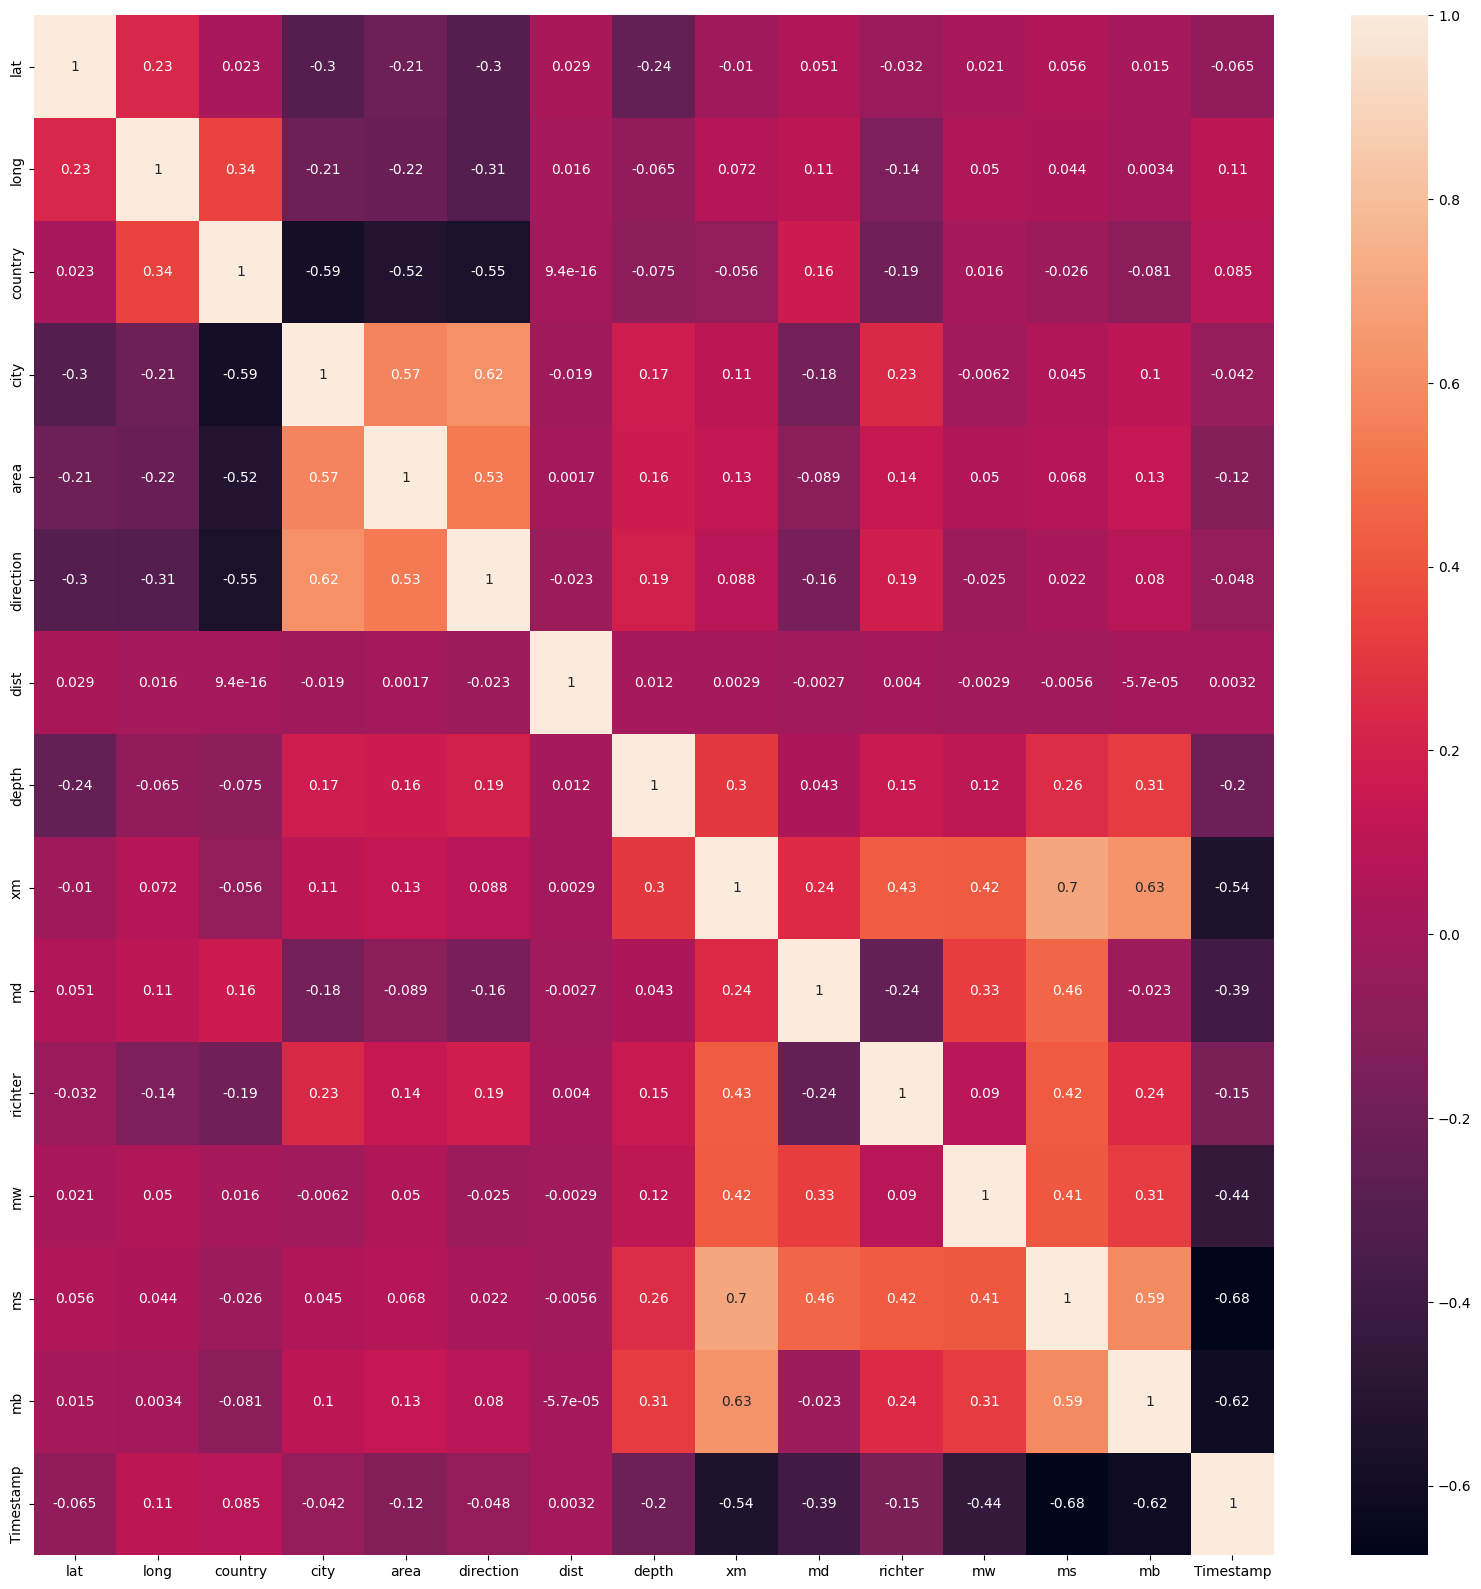

In [28]:
plt.figure(figsize=(20,20))
dataplot=sns.heatmap(df.corr(),annot=True)
plt.show()

Normalization of data

In [29]:
# Using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)
df.head()

,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,Timestamp
0,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.0,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000,0.866875
1,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.0,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000,0.906252
2,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.0,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127,0.632149
3,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.0,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000,0.809118
4,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.0,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000,0.837535


# **Splitting** the Dataset

In [30]:
y=np.array(df['xm'])
X=np.array(df.drop('xm',axis=1))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Creating** Models

## Linear **Regression**

In [31]:
from sklearn.linear_model import LinearRegression
start1 = time.time()
linear=LinearRegression()
linear.fit(X_train,y_train)
ans1 = linear.predict(X_test)
end1 = time.time()
t1 = end1-start1

In [32]:
accuracy1=linear.score(X_test,y_test)
print("Accuracy of Linear Regression model is:",accuracy1)


Accuracy of Linear Regression model is: 0.63134131503029


In [33]:
from sklearn import metrics

print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

Linear Regression
Mean Absolute Error: 0.05878246463205686
Mean Squared Error: 0.0062582716972663585
Root Mean Squared Error: 0.07910923901331852


Text(0, 0.5, 'Predicted Magnitude')

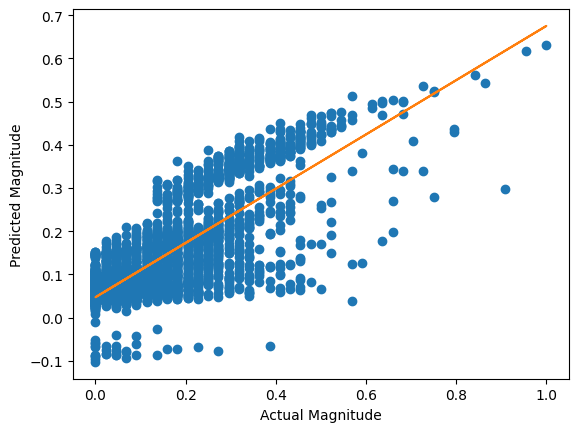

In [34]:
plt.plot(y_test, ans1, 'o')
m, b = np.polyfit(y_test,ans1, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

# *2*. **Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
start2 = time.time()
regressor = DecisionTreeRegressor(random_state = 40)
regressor.fit(X_train,y_train)
ans2 = regressor.predict(X_test)
end2 = time.time()
t2 = end2-start2



In [36]:
accuracy2=regressor.score(X_test,y_test)
print("Accuracy of Decision Tree model is:",accuracy2)

Accuracy of Decision Tree model is: 0.9932960893884235


In [37]:
print("Decision Tree")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans2)))

Decision Tree
Mean Absolute Error: 0.0006909999621372331
Mean Squared Error: 0.00011380416561969702
Root Mean Squared Error: 0.010667903525046383


# 3.KNN Model


In [38]:
from sklearn.neighbors import KNeighborsRegressor
start3 = time.time()
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans3 = knn.predict(X_test)
end3 = time.time()
t3 = end3-start3


In [39]:
accuracy3=knn.score(X_test,y_test)
print("Accuracy of KNN model is:",accuracy3)

Accuracy of KNN model is: 0.8457466919393031


In [40]:
print("KNN Model")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans3)))

KNN Model
Mean Absolute Error: 0.03305598677318794
Mean Squared Error: 0.002618571462992348
Root Mean Squared Error: 0.051171979275696854


In [41]:
import random
info = {}
for i in range(10):
  k = random.randint(2,10)
  startk = time.time()
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  ans3 = knn.predict(X_test)
  endk = time.time()
  tk = endk-startk
  acc3=knn.score(X_test,y_test)
  info[k] = [acc3,tk]

for i in info:
  print("for k =",i,": accuracy =",info[i][0])

for k = 10 : accuracy = 0.8296048410841246
for k = 2 : accuracy = 0.8586776991043075
for k = 6 : accuracy = 0.8457466919393031
for k = 7 : accuracy = 0.8425261199362686
for k = 3 : accuracy = 0.8590665076146249
for k = 9 : accuracy = 0.8334625255508568


Text(0.5, 1.0, 'Accuracy for different values of k')

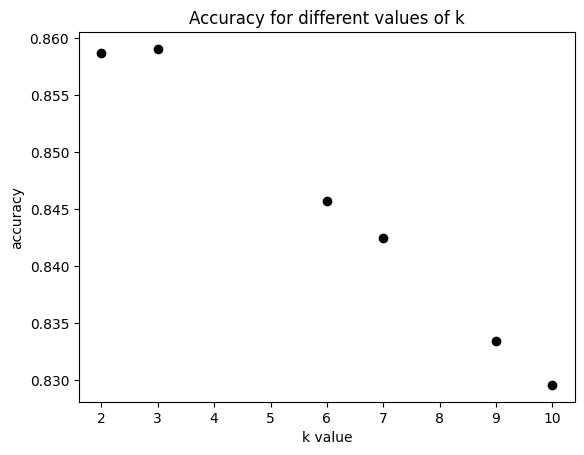

In [42]:
x = list(info.keys())
yacc = []
for i in info:
  yacc.append(info[i][0])
plt.plot(x, yacc, 'o', color='black');
plt.xlabel("k value")
plt.ylabel("accuracy");
plt.title("Accuracy for different values of k")

Text(0.5, 1.0, 'Execution time for different values of k')

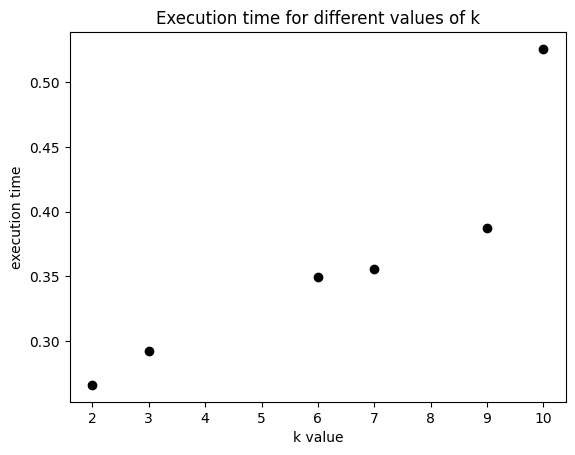

In [43]:
yt = []
for i in info:
  yt.append(info[i][1])
plt.plot(x, yt, 'o', color='black');
plt.xlabel("k value")
plt.ylabel("execution time");
plt.title("Execution time for different values of k")

# MLP **Regressor**

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
mlp_regressor = MLPRegressor(random_state=42, max_iter=1000)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.00
Root Mean Squared Error: 0.02
Mean Absolute Error: 0.01
R^2 Score: 0.97


# **SVR**

In [45]:
from sklearn.svm import SVR
# Build the SVM Regressor model
svm_regressor = SVR()

# Train the model
svm_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.00
Root Mean Squared Error: 0.05
Mean Absolute Error: 0.05
R^2 Score: 0.83


# **ADA Boost Regressor**

In [46]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_regressor = AdaBoostRegressor(random_state=42)

# Train the model
adaboost_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.01
Root Mean Squared Error: 0.08
Mean Absolute Error: 0.06
R^2 Score: 0.65


In [47]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(random_state=42)

# Train the model
forest_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = forest_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.00
Root Mean Squared Error: 0.01
Mean Absolute Error: 0.00
R^2 Score: 1.00


In [48]:
import pandas as pd
model_names = ['Linear Regression', 'Decision tree regressor', 'knn','MLP regressor', 'SVM regressor', 'Adaboost regressor', ]
r2_scores = [0.078,0.010,0.0611,0.02,0.05,0.07]


# Create a DataFrame from the data
data = {'Model': model_names, 'r2 Score': r2_scores}
dn = pd.DataFrame(data)
sorted_dn = dn.sort_values(by='r2 Score', ascending=False)
sorted_dn

,Model,r2 Score
0,Linear Regression,0.0780
5,Adaboost regressor,0.0700
2,knn,0.0611
4,SVM regressor,0.0500
3,MLP regressor,0.0200
1,Decision tree regressor,0.0100


# Hyper Parameter Tuning

In [49]:
# Define the parameter grid for hyperparameter tuning
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [50]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



# Define the pipeline: StandardScaler for normalization and LinearRegression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__fit_intercept': [True, False]  # `normalize` is not used in recent versions, use scaler instead
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R^2 Score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'regressor__fit_intercept': True}
Best Cross-Validation R^2 Score: 0.6241166760353647
Test MSE: 0.00625827169726629
Test R^2: 0.6313413150302941


# **Save the model**

In [51]:
import joblib  # For saving the model

# Assuming `best_model` is the trained model from GridSearchCV
# Save the best model to a file
model_filename = 'best_linear_regression_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

# (Optional) Load the model from the file to verify it has been saved correctly
loaded_model = joblib.load(model_filename)
print("Loaded model:", loaded_model)

# Verify the loaded model works as expected
y_pred_loaded = loaded_model.predict(X_test)
loaded_model_mse = mean_squared_error(y_test, y_pred_loaded)
loaded_model_r2 = r2_score(y_test, y_pred_loaded)

print(f"Loaded Model Test MSE: {loaded_model_mse}")
print(f"Loaded Model Test R^2: {loaded_model_r2}")


Model saved as best_linear_regression_model.pkl
Loaded model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
Loaded Model Test MSE: 0.00625827169726629
Loaded Model Test R^2: 0.6313413150302941


## Prediction with unseen **data**

In [52]:
import joblib
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample training data generation for demonstration
np.random.seed(42)
num_samples = 100

lat = np.random.uniform(-90, 90, num_samples)
long = np.random.uniform(-180, 180, num_samples)
dist = np.random.uniform(0, 1000, num_samples)
depth = np.random.uniform(0, 700, num_samples)
xm = np.random.uniform(3, 9, num_samples)
md = np.random.uniform(3, 9, num_samples)
richter = np.random.uniform(3, 9, num_samples)
mw = np.random.uniform(3, 9, num_samples)
ms = np.random.uniform(3, 9, num_samples)
mb = np.random.uniform(3, 9, num_samples)

# Combine features into a DataFrame
data = {
    'lat': lat,
    'long': long,
    'dist': dist,
    'depth': depth,
    'xm': xm,
    'md': md,
    'richter': richter,
    'mw': mw,
    'ms': ms,
    'mb': mb
}

df = pd.DataFrame(data)

# Target variable (dummy values for demonstration)
target = np.random.uniform(5, 7, num_samples)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Define a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Add the scaler
    ('model', LinearRegression())   # Add the model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline to a file
joblib.dump(pipeline, 'pipeline_model.pkl')


['pipeline_model.pkl']

In [53]:
import joblib
import pandas as pd
import numpy as np

# Load the saved pipeline model
pipeline_model = joblib.load('pipeline_model.pkl')

# Generate new synthetic data for prediction (same as the earlier example)
num_samples = 10  # Number of samples to predict

np.random.seed(42)
lat = np.random.uniform(-90, 90, num_samples)
long = np.random.uniform(-180, 180, num_samples)
dist = np.random.uniform(0, 1000, num_samples)
depth = np.random.uniform(0, 700, num_samples)
xm = np.random.uniform(3, 9, num_samples)
md = np.random.uniform(3, 9, num_samples)
richter = np.random.uniform(3, 9, num_samples)
mw = np.random.uniform(3, 9, num_samples)
ms = np.random.uniform(3, 9, num_samples)
mb = np.random.uniform(3, 9, num_samples)

# Combine all features into a DataFrame for prediction
data = {
    'lat': lat,
    'long': long,
    'dist': dist,
    'depth': depth,
    'xm': xm,
    'md': md,
    'richter': richter,
    'mw': mw,
    'ms': ms,
    'mb': mb
}

# Create the DataFrame for prediction
prediction_df = pd.DataFrame(data)

# Display the DataFrame
print("Data for Prediction:")
print(prediction_df)

# Make predictions using the loaded pipeline model
predictions = pipeline_model.predict(prediction_df)

# Display the predictions
print("\nPredictions:")
print(predictions)


Data for Prediction:
         lat        long        dist       depth        xm        md  \
0 -22.582779 -172.589582  611.852895  425.281396  3.732229  8.817508   
1  81.128575  169.167547  139.493861  119.366887  5.971061  7.650797   
2  41.758910  119.679351  292.144649   45.536115  3.206331  8.636994   
3  17.758527 -103.557920  366.361843  664.219876  8.455922  8.368964   
4 -61.916645 -114.543012  456.069984  675.942423  4.552680  6.587400   
5 -61.920986 -113.974376  785.175961  565.878144  6.975134  8.531245   
6 -79.544950  -70.472793  199.673782  213.229638  4.870266  3.530955   
7  65.911706    8.912315  514.234438   68.370480  6.120408  4.175897   
8  18.200702  -24.499793  592.414569  478.963119  6.280262  3.271364   
9  37.453064  -75.157510   46.450413  308.106746  4.109127  4.951982   

    richter        mw        ms        mb  
0  5.332064  7.633469  8.178621  3.717565  
1  4.628094  4.192294  6.739789  7.279469  
2  7.972425  3.033133  4.985388  7.564710  
3  5.14052

# **Conclusion**

In this project, we developed a machine learning model to predict earthquake magnitudes using synthetic data. We employed a linear regression model and integrated preprocessing steps into a pipeline, ensuring consistency in data transformation. Despite the model’s simplicity, it provided a foundational understanding of the relationship between input features and earthquake magnitudes. The approach demonstrated the importance of proper data preparation and the potential for model deployment. For future work, applying this method to real-world data and exploring more advanced models can further enhance predictive accuracy and practical application.





